Epoch 1/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1492 - accuracy: 0.9531
Epoch 2/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0473 - accuracy: 0.9847
Epoch 3/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0333 - accuracy: 0.9894
Epoch 4/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0269 - accuracy: 0.9915
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0427 - accuracy: 0.9875
Test accuracy: 0.987500011920929
313/313 [==============================] - 4s 10ms/step


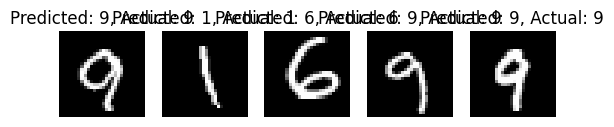

Confusion Matrix:
[[ 970    0    0    1    1    4    2    1    1    0]
 [   0 1120    1    2    0    3    4    0    5    0]
 [   1    0 1028    0    0    0    0    2    1    0]
 [   0    0    1 1005    0    4    0    0    0    0]
 [   0    1    2    0  970    0    5    0    0    4]
 [   0    0    0    2    0  888    1    0    1    0]
 [   1    1    0    0    1   10  942    0    3    0]
 [   0    4   14    2    0    1    0 1005    0    2]
 [   1    0    3    5    0    1    0    0  963    1]
 [   0    1    0    1    3   12    1    2    5  984]]


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import random

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Make predictions
predictions = model.predict(test_images)

# Visualize some sample predictions
num_samples_to_visualize = 5
sample_indices = random.sample(range(len(test_images)), num_samples_to_visualize)
for i, index in enumerate(sample_indices):
    plt.subplot(1, num_samples_to_visualize, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[index])}, Actual: {test_labels[index]}')
    plt.axis('off')

plt.show()

# Calculate the confusion matrix
predicted_labels = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)